In [72]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [73]:
ravdess = 'D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_01-24'
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [74]:
len(ravdess_directory_list)

24

In [75]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as there are 24 different actors in our directory, we need to extract files for each actor.
    actor_path = os.path.join(ravdess, i)  # Properly join the path
    actor = os.listdir(actor_path)
    for f in actor:
        part = f.split('.')[0].split('-')
        # third part in each file represents the emotion associated with that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(actor_path, f))  # Properly join the file path

In [76]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)


03-01-01-01-01-01-24.wav
03
D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_01-24\Actor_01\03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [77]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1  neutral  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
2  neutral  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
3  neutral  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
4  neutral  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
______________________________________________
      Emotions                                               Path
1435  surprise  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1436  surprise  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1437  surprise  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1438  surprise  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1439  surprise  D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

In [78]:
data_path = ravdess_df
data_path.to_csv("data_path.csv",index=False)
data_path.tail()

,Emotions,Path
1435,surprise,D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1436,surprise,D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1437,surprise,D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1438,surprise,D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...
1439,surprise,D:/CVR_MINI_PROG/RAVDESS/audio_speech_actors_0...


In [79]:
print(data_path.Emotions.value_counts())

Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


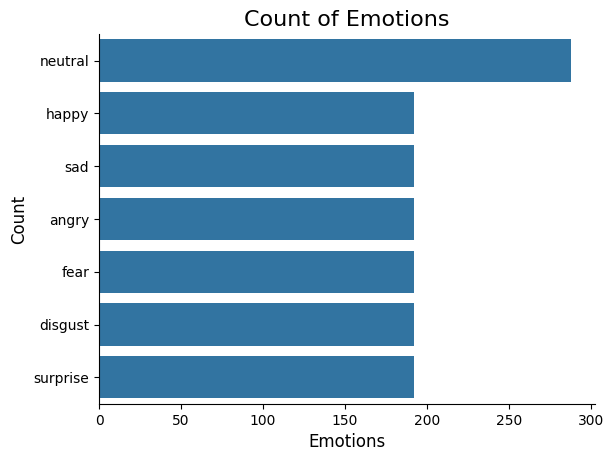

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [81]:
data,sr = librosa.load(file_path[0])
sr #new chnages 

22050

In [82]:
ipd.Audio(data,rate=sr)

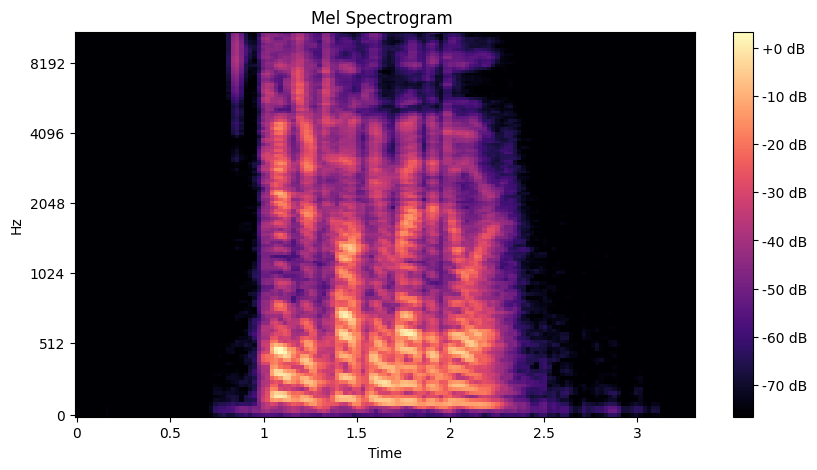

In [83]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

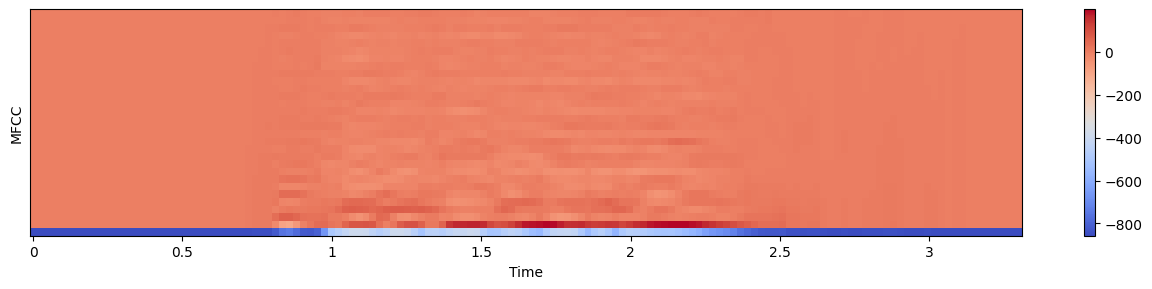

In [84]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

DATA AUGMENTATION


In [89]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

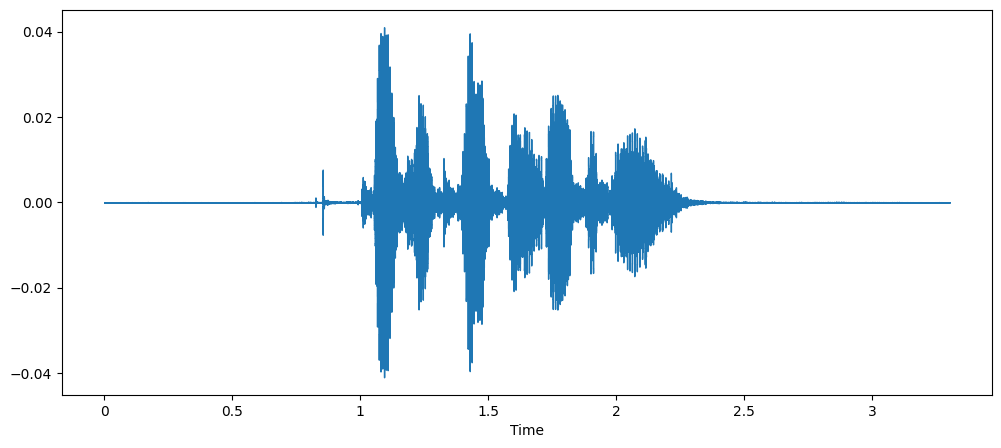

In [86]:

import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

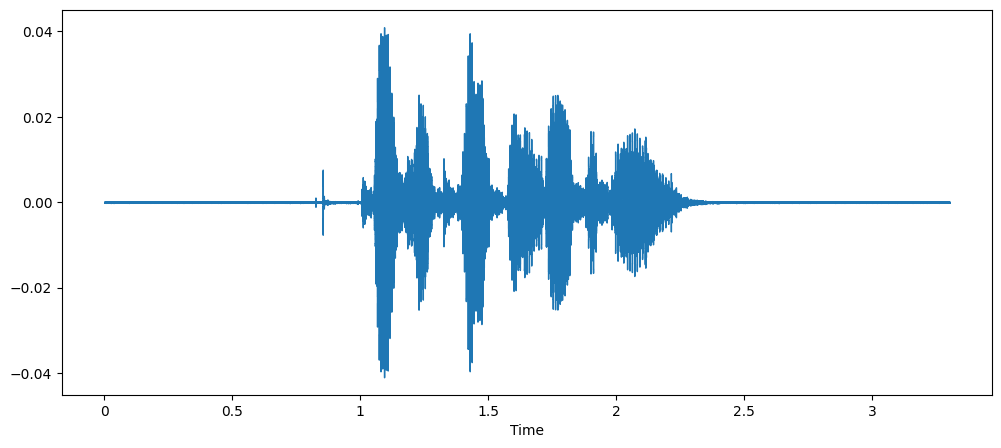

In [87]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [90]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

TypeError: time_stretch() takes 1 positional argument but 2 were given

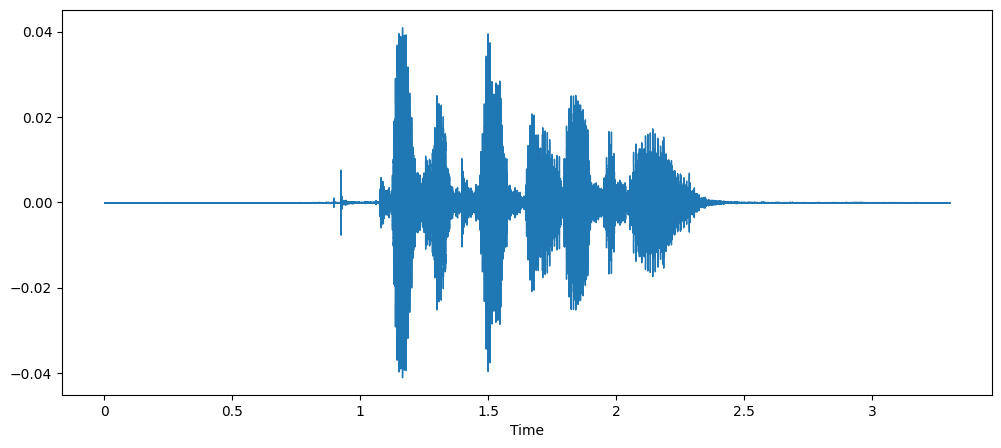

In [42]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [40]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

TypeError: pitch_shift() missing 2 required keyword-only arguments: 'sr' and 'n_steps'

FEATURE EXTRACTION